In [964]:
import pandas as pd

In [965]:
rawDataset = pd.read_csv("https://raw.githubusercontent.com/abdibrokhim/datasets/master/diabetes.csv")

In [966]:
rawDataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [967]:
rawDataset.shape

(768, 9)

In [968]:
rawDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [969]:
rawDataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The final result is:

X_train and y_train - for training, data and target, respectively

X_test - data for predicting with the algorithm

y_test - target for validation the model

In [970]:
import numpy as np

In [971]:
# non_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# for col in non_zero:
#   rawDataset[col] = rawDataset[col].replace(0, np.NaN)
#   mean = int(rawDataset[col].median(skipna=True))
#   rawDataset[col] = rawDataset[col].replace(np.NaN, mean)

In [972]:
rawDataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [973]:
train = rawDataset.sample(frac=0.7, random_state=500)

In [974]:
test = rawDataset.drop(train.index)

In [975]:
X_train = train.drop(labels=['Pregnancies', 'Outcome'], axis=1)

In [976]:
y_train = train.Outcome

In [977]:
X_test = test.drop(labels=['Pregnancies', 'Outcome'], axis=1)

In [978]:
y_test = test.Outcome

In [979]:
print(X_train.head(),"\n", y_train.head())

     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
132      170             64             37      225  34.5   
636      104             74              0        0  28.8   
743      140             94              0        0  32.7   
159      163             72             41      114  40.9   
395      127             58             24      275  27.7   

     DiabetesPedigreeFunction  Age  
132                     0.356   30  
636                     0.153   48  
743                     0.734   45  
159                     0.817   47  
395                     1.600   25   
 132    1
636    0
743    1
159    1
395    0
Name: Outcome, dtype: int64


In [980]:
X_train.shape,X_test.shape

((538, 7), (230, 7))

In [981]:
y_train.shape,y_test.shape

((538,), (230,))

In [982]:
from sklearn.neighbors import KNeighborsClassifier

In [983]:
knn = KNeighborsClassifier(n_neighbors=3)

In [984]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [985]:
knn.score(X_test,y_test)

0.7391304347826086

In [986]:
results = knn.predict(X_test)

In [987]:
results

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [988]:
print(pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='Total'))

Predicted    0   1  Total
Real                     
0          118  27    145
1           33  52     85
Total      151  79    230


In [989]:
from sklearn import metrics

Optimizing the Parameter K (n_neighbors)

In [990]:
k_list = list(range(1,31))

In [991]:
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())

dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])


In [992]:
from sklearn.model_selection import GridSearchCV

In [993]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

In [994]:
grid.fit(rawDataset.drop(labels=['Pregnancies', 'Outcome'], axis=1), rawDataset.Outcome)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [995]:
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003613,0.001194,0.006562,0.000227,1,{'n_neighbors': 1},0.636364,0.642857,0.688312,0.764706,0.607843,0.668016,0.054802,30
1,0.003585,0.000703,0.008883,0.001967,2,{'n_neighbors': 2},0.668831,0.668831,0.694805,0.738562,0.686275,0.691461,0.025616,29
2,0.003290,0.000323,0.007077,0.000551,3,{'n_neighbors': 3},0.681818,0.707792,0.753247,0.764706,0.692810,0.720075,0.033015,28
3,0.003728,0.000958,0.008159,0.001515,4,{'n_neighbors': 4},0.694805,0.720779,0.733766,0.738562,0.718954,0.721373,0.015239,27
4,0.003635,0.000520,0.007635,0.000459,5,{'n_neighbors': 5},0.714286,0.727273,0.733766,0.745098,0.692810,0.722647,0.017940,26


In [996]:
for key in grid.cv_results_.keys():
  print(key) 

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [997]:
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank

,params,mean_test_score,std_test_score,rank_test_score
12,{'n_neighbors': 13},0.761752,0.035902,1


In [998]:
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))

The best value of k = {'n_neighbors': 13} with 0.7617519735166794 of accuracy.


In [999]:
print("The best k value, rank {}, with k = {}, highest mean accuracy along with the cross validation = {} and lowest standard deviation = {}".format(grid_table.at[grid.best_index_,'rank_test_score'],grid_table.at[grid.best_index_,'params'],grid_table.at[grid.best_index_,'mean_test_score'],grid_table.at[grid.best_index_,'std_test_score']))

The best k value, rank 1, with k = {'n_neighbors': 13}, highest mean accuracy along with the cross validation = 0.7617519735166794 and lowest standard deviation = 0.03590178543220693


In [1000]:
print("The best classifier is: {}".format(grid.best_estimator_))

The best classifier is: KNeighborsClassifier(n_neighbors=13)


In [1001]:
import matplotlib.pyplot as plt

In [1002]:
graphic = grid.cv_results_['mean_test_score']
graphic

array([0.6680163 , 0.69146083, 0.7200747 , 0.7213734 , 0.72264663,
       0.73181394, 0.7422375 , 0.75654019, 0.75394279, 0.74352771,
       0.75002971, 0.75914608, 0.76175197, 0.75914608, 0.74094729,
       0.75132841, 0.75525847, 0.7500382 , 0.75136236, 0.74875647,
       0.74356167, 0.74874798, 0.74875647, 0.74484339, 0.73963161,
       0.7409388 , 0.74615058, 0.74089636, 0.73960615, 0.74480944])

([<matplotlib.axis.XTick at 0x7f363d83ad90>,
 <a list of 11 Text major ticklabel objects>)

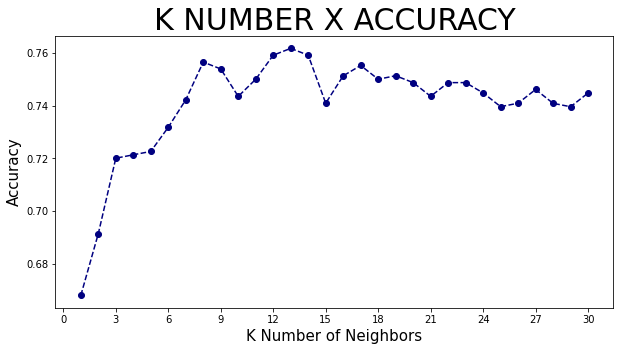

In [1003]:
plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,31,3),)